In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import entropy
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')
pune_df = pd.read_csv('/content/gdrive/MyDrive/Indian_housing_Pune_data.csv')

Mounted at /content/gdrive


In [ ]:
cat_cols = pune_df.select_dtypes(include='object').columns.tolist()
q3 = pune_df["price"].quantile(0.75)
pune_df = pune_df[pune_df['price'] <= 2 * q3]

In [ ]:
X = pune_df.copy()
y = X.pop('price')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=13)

In [ ]:
le = LabelEncoder()
for col in cat_cols:
    unique_values = pd.concat([X_train[col], X_test[col]]).unique().astype(str)
    le.fit(unique_values)
    X_train[col] = le.transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation Metrics for Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - Mean absolute error: {rf_mae}")
print(f"Random Forest - Root mean squared error: {rf_rmse}")
print(f"Random Forest - Mean r squared score: {rf_r2}")

Random Forest - Mean absolute error: 2422.3997886393663
Random Forest - Root mean squared error: 3818.893067033248
Random Forest - Mean r squared score: 0.8146277843598557


In [ ]:
# Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluation Metrics for Gradient Boosting
gb_mae = mean_absolute_error(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
gb_r2 = r2_score(y_test, gb_pred)

print(f"Gradient Boosting - Mean absolute error: {gb_mae}")
print(f"Gradient Boosting - Root mean squared error: {gb_rmse}")
print(f"Gradient Boosting - Mean r squared score: {gb_r2}")


Gradient Boosting - Mean absolute error: 2653.051693397977
Gradient Boosting - Root mean squared error: 3788.5888730465426
Gradient Boosting - Mean r squared score: 0.817558092641822


In [ ]:
rf_errors = y_test - rf_pred
gb_errors = y_test - gb_pred

# Calculate probability distributions
rf_hist, rf_bins = np.histogram(rf_errors, bins=30, density=True)
gb_hist, gb_bins = np.histogram(gb_errors, bins=30, density=True)

# Avoid division by zero in KL divergence calculation
rf_hist += 1e-10  # Smoothing
gb_hist += 1e-10  # Smoothing

# Calculate KL divergence
kl_rf_to_gb = entropy(rf_hist, gb_hist)
kl_gb_to_rf = entropy(gb_hist, rf_hist)

print(f"KL Divergence (Random Forest || Gradient Boosting): {kl_rf_to_gb}")
print(f"KL Divergence (Gradient Boosting || Random Forest): {kl_gb_to_rf}")

KL Divergence (Random Forest || Gradient Boosting): 0.12995317678155988
KL Divergence (Gradient Boosting || Random Forest): 0.14497973124655805


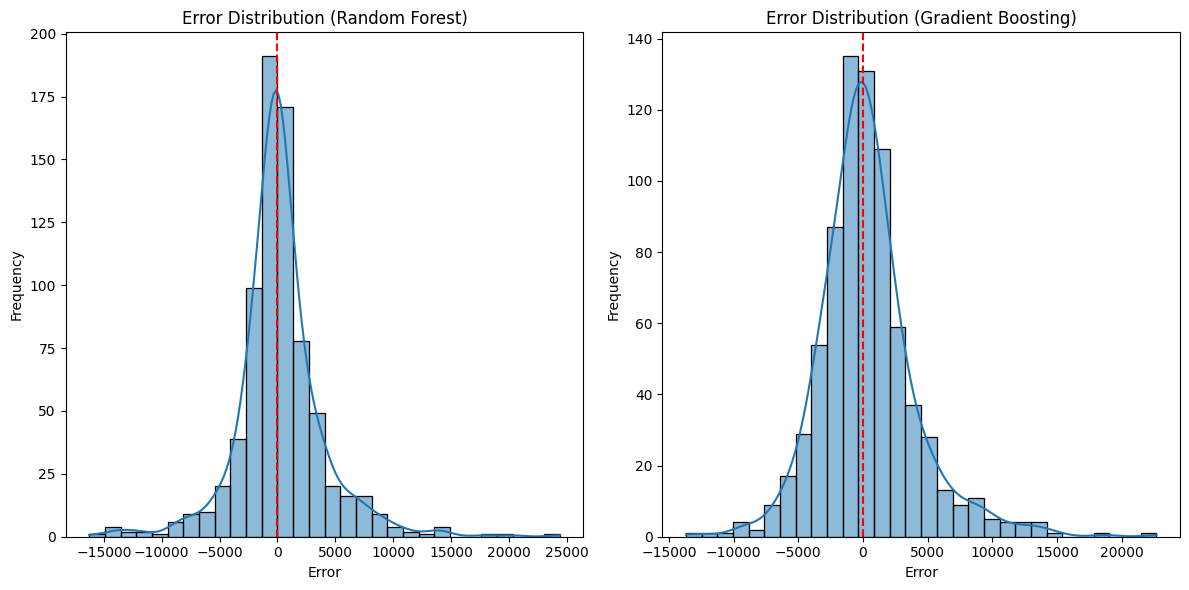

In [ ]:
# Plotting error distribution for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(rf_errors, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Error Distribution (Random Forest)')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Plotting error distribution for Gradient Boosting
plt.subplot(1, 2, 2)
sns.histplot(gb_errors, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Error Distribution (Gradient Boosting)')
plt.xlabel('Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
